# Regression using Feed Forward Neural Network 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

## Accessing the dataset

In [4]:
house=fetch_california_housing()
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
house['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
house['data'].shape

(20640, 8)

In [7]:
house['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
# Feature set

X=pd.DataFrame(house['data'],columns=house['feature_names'])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
# Target

house['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
house['target_names']

['MedHouseVal']

In [11]:
y=pd.DataFrame(house['target'],columns=house['target_names'])
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


## Standardisation 

In [12]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_scaled=sc.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

## Splitting data to train and test

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,
                      y, test_size=0.2, random_state=100)


X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## Building the model

BASIC MODEL

In [14]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(20,activation='relu'))
model_1.add(tf.keras.layers.Dense(1))

## Compiling the model

In [15]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['mae'])

## Training the model

Epoch 1/100
516/516 [==============================] - 1s 1ms/step - loss: 1.3176 - mae: 0.8292
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.5722 - mae: 0.5468
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4660 - mae: 0.4883
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4306 - mae: 0.4690
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4134 - mae: 0.4584
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4056 - mae: 0.4545
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4064 - mae: 0.4497
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3928 - mae: 0.4449
Epoch 9/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3864 - mae: 0.4413
Epoch 10/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3819 - mae: 0.4385
Epoch 11/100
516/516 [=================

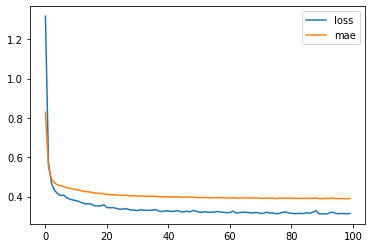

In [16]:
tf.random.set_seed(100)
history=model_1.fit(X_train,y_train,epochs=100)
hist=pd.DataFrame(history.history)
hist.plot();

## Model summary


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 20)                  180       
                                                                 
 dense_1 (Dense)             (32, 1)                   21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


## Plotting 

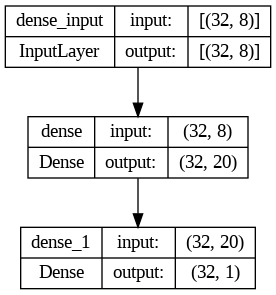

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

## Evaluation of the model

In [26]:
test_mse,test_mae=model_1.evaluate(X_test,y_test)

129/129 [==============================] - 0s 999us/step - loss: 1.1254 - mae: 0.7133


In [20]:
print('Test MSE:',test_mse)
print('Train MSE:0.3076' )

Test MSE: 0.3175203800201416
Train MSE:0.3076


In [21]:
print('Test MAE:', test_mae)
print('Train MAE:0.3835 ')

Test MAE: 0.3885144293308258
Train MAE:0.3835 


MODEL_2: MODEL WITH NORMALISED DATA

In [22]:
normaliser=tf.keras.layers.Normalization()
normaliser.adapt(X_train)
normaliser.adapt(X_test)
X_train=normaliser(X_train)
X_test=normaliser(X_test)

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 1.5537 - mae: 0.7554
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.5769 - mae: 0.5168
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4533 - mae: 0.4777
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4174 - mae: 0.4608
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4039 - mae: 0.4503
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3957 - mae: 0.4456
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3886 - mae: 0.4398
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3835 - mae: 0.4357
Epoch 9/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3806 - mae: 0.4329
Epoch 10/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3745 - mae: 0.4298
Epoch 11/100
516/516 [=================

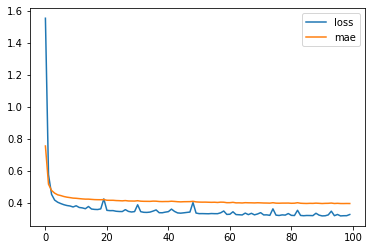

In [23]:
# Building the model:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(20,activation='relu'))
model_2.add(tf.keras.layers.Dense(1))

# compiling the model:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['mae'])
# Training 
tf.random.set_seed(100)
history=model_2.fit(X_train,y_train,epochs=100)
hist=pd.DataFrame(history.history)
hist.plot();

# summary:
model_2.summary()

# plot:

from tensorflow.keras.utils import plot_model

plot_model(model_2, show_shapes=True)
# evaluation:
test_mse,test_mae=model_2.evaluate(X_test,y_test)

print('Test MSE:',test_mse)
print('Train MSE:0.3076' )

print('Test MAE:', test_mae)
print('Train MAE:0.3835 ')

# REMARK:

MODEL3: MODEL WITH VALIDATION

Epoch 1/100
516/516 [==============================] - 1s 1ms/step - loss: 1.2067 - mae: 0.7895
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.5853 - mae: 0.5428
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4643 - mae: 0.4910
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4276 - mae: 0.4708
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4112 - mae: 0.4579
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4013 - mae: 0.4513
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4116 - mae: 0.4446
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3845 - mae: 0.4394
Epoch 9/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3793 - mae: 0.4362
Epoch 10/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3782 - mae: 0.4339
Epoch 11/100
516/516 [=================

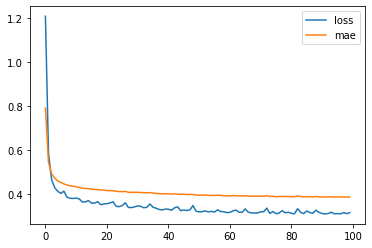

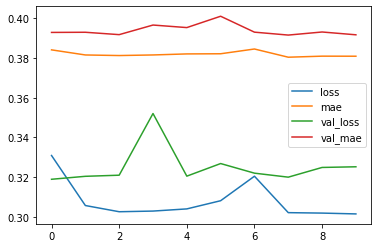

In [25]:
# Building the model:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(20,activation='relu'))
model_3.add(tf.keras.layers.Dense(1))

# compiling the model:
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['mae'])
# Training 
tf.random.set_seed(100)
history=model_3.fit(X_train,y_train,epochs=100)
hist=pd.DataFrame(history.history)
hist.plot();

## Validation split
hist_3=model_3.fit(X_train,y_train,epochs=10, validation_split=0.2)
pd.DataFrame(hist_3.history).plot();

# summary:
model_3.summary()

# plot:

from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)
# evaluation:
test_mse,test_mae=model_3.evaluate(X_test,y_test)

print('Test MSE:',test_mse)
print('Train MSE:0.3076' )

print('Test MAE:', test_mae)
print('Train MAE:0.3835 ')

 MODEL WITH DROUP-OUT

In [ ]:
# Dropout layer
model_4.add(tf.keras.layers.Dropout(0.1)) # 10% of units will be dropped

model_4.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
# MODEL WITH EARLY STOP:
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',

In [ ]:
# MODEL WITH BATCH NORMALISATION:

# Batch Normalisation
model_6.add(tf.keras.layers.BatchNormalization())
model_6.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
# MODEL WITH 2 HIDDEN LAYERS:
## Adding one more layer
model_7.add(tf.keras.layers.Dense(100,activation='relu'))

model_7.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
# MODEL WITH CHANGED NO. OF UNITS:
# Change the no of units to 50
model_8.add(tf.keras.layers.Dense(50,activation='relu'))

model_8.add(tf.keras.layers.Dense(10,activation='softmax'))

## Prediction using the model


In [ ]:
y_pred=model_1.predict(X_test)
print('The predicted house prices:\n',y_pred)

In [ ]:
y_test

,MedHouseVal
8151,2.45300
53,1.04200
3039,1.46200
9484,1.54200
9307,3.24200
...,...
16733,1.17200
5264,5.00001
12374,2.39300
19662,0.85700


Refer: 

https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c